In this tutorial, we will introduce the environment wrapper,

which provides SPIDER-regulated observation and executes the actions in the environment.

A series of visualization tools and benchmark tools are available as well.

Before reading this, it is recommended to get through the interface.ipynb.

It is based on spider-python==0.1.16.4

If you are using a different version, the code may not work as expected. 


# 1. The core functions of an environment wrapper

It should be noted that an environment wrapper is only used to configure the environment and reflect the objective transition rules of the state. And it contains such 3 important functions:

def reset(self):
    pass

def wrap_observation(self):
    pass

def conduct_trajectory(self, trajectory):
    pass


And if you preset the scenarios, the termination conditions and also the benchamarking metrics, then you can get a Benchmark class, which can test different SPIDER-regulated planner. 

def test(self, spider_planner, episodes=1, log=False):
    pass


# 2. Use the pre-defined environment wrapper

## 2.1 simple environment

(In spider<=0.16, it is named DummyInterface.)

Cython module not found. Use pyximport temporally


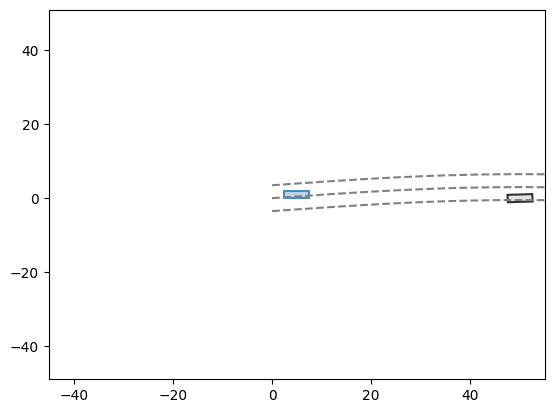

In [1]:
from spider.interface import DummyInterface
from spider.planner_zoo import LatticePlanner
import spider.visualize as vis
%matplotlib inline

planner = LatticePlanner({
    "steps": 20,
    "dt": 0.2,
    "print_info": False
})

env = DummyInterface()
obs = ego_state, perception, local_map = env.reset() # .reset() will return the initial observation
obs = ego_state, perception, local_map = env.wrap_observation()
vis.lazy_draw(*obs)

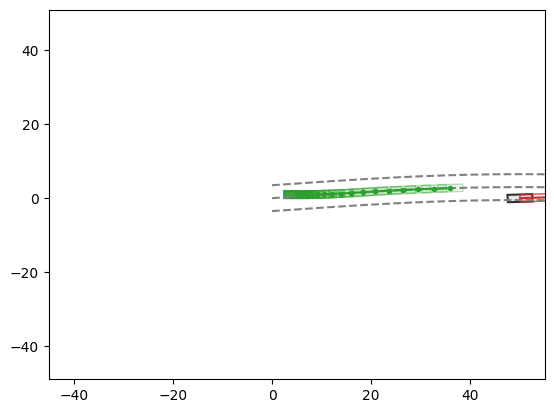

In [2]:
traj = planner.plan(ego_state, perception, local_map)
vis.lazy_draw(*obs, traj)

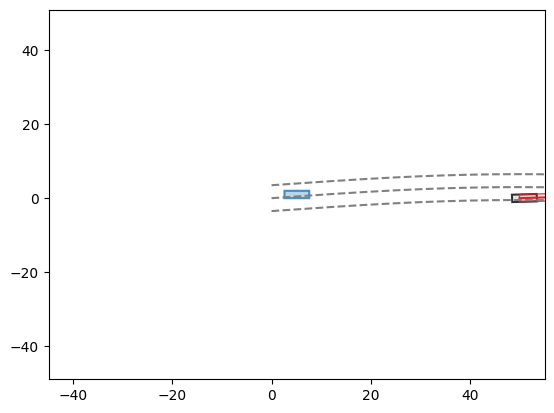

In [3]:
env.conduct_trajectory(traj)

obs = ego_state, perception, local_map = env.wrap_observation()
vis.lazy_draw(*obs)

In [15]:
%matplotlib

env.reset()
vis.figure(figsize=(8, 4))

for _ in range(50):
    obs = env.wrap_observation()
    traj = planner.plan(*obs)
    
    vis.cla()
    vis.lazy_draw(*obs, traj)
    vis.ego_centric_view(obs[0].x(), obs[0].y())
    vis.pause(0.01)
    
    env.conduct_trajectory(traj)
    

Using matplotlib backend: TkAgg


In [18]:
from spider.interface import DummyBenchmark
%matplotlib

benchmark = DummyBenchmark({
    "evaluation": True
})
benchmark.test(planner)

{'route_completion': 1.0, 'collision_rate': 0.0, 'min_ttc': 0.0, 'low_ttc_rate': 0.13580246913580246, 'avg_speed': 15.37801721084431, 'avg_jerk': 0.892441415440504, 'max_stuck_frames': 0}


## 2.2 highway-env


In [4]:
from spider.interface.highway_env import HighwayEnvBenchmark

planner = LatticePlanner({
        "steps": 30,
        'dt' : 0.1,
        "max_speed": 120/3.6,
        "end_s_candidates": (20, 30, 40, 80),
        "end_l_candidates": (-4,0,4), # s,d采样生成横向轨迹 (-3.5, 0, 3.5), #
        "end_v_candidates": tuple(i*120/3.6/4 for i in range(5)), # 改这一项的时候，要连着限速一起改了
        "end_T_candidates": (1,2,4,8), # s_dot, T采样生成纵向轨迹
        "print_info": False
    })


benchmark = HighwayEnvBenchmark(config={"max_steps":200, "save_video":False})
benchmark.test(planner)


d:\Environment\Python\Python38\lib\site-packages\gymnasium\utils\passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(
d:\Environment\Python\Python38\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at d:\Workspace\MyLibrary\spider\tutorial\videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video d:\Workspace\MyLibrary\spider\tutorial\videos\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Workspace\MyLibrary\spider\tutorial\videos\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\Workspace\MyLibrary\spider\tutorial\videos\rl-video-episode-0.mp4
{'avg_cumulative_reward': 0.0}


In [5]:
from spider.interface.highway_env import HighwayEnvBenchmarkGUI
HighwayEnvBenchmarkGUI.launch()

d:\Environment\Python\Python38\lib\site-packages\gymnasium\utils\passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(


{'avg_cumulative_reward': 0.0}


<tkinter.Tk object .>

# 3. CARLA

Interface only for now.

天气工具、灯光工具
视角变换、交通生成